In [2]:
# importing the required modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
# importing the dataset(i,e all the images from directory)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
#create a variable and assign all our image folders into it
class_names = dataset.class_names #folder name are our class name
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
#explore the dataset
#dataset.take(1) takes the first one sample
#dataset.take(10) takes the first ten sample
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) # get the first image data in tensor

#image_batch: Represents a batch of images from the dataset.
#label_batch: Corresponds to the labels associated with the images in the batch.
#The printed statement (print(image_batch[0])) outputs the data tensor of the first image in the batch

tf.Tensor(
[[[143. 140. 149.]
  [154. 151. 160.]
  [153. 150. 159.]
  ...
  [150. 147. 154.]
  [155. 152. 159.]
  [154. 151. 158.]]

 [[142. 139. 148.]
  [151. 148. 157.]
  [149. 146. 155.]
  ...
  [160. 157. 164.]
  [167. 164. 171.]
  [160. 157. 164.]]

 [[136. 133. 142.]
  [143. 140. 149.]
  [142. 139. 148.]
  ...
  [157. 154. 161.]
  [159. 156. 163.]
  [148. 145. 152.]]

 ...

 [[174. 172. 183.]
  [172. 170. 181.]
  [169. 167. 178.]
  ...
  [186. 185. 193.]
  [187. 186. 194.]
  [187. 186. 194.]]

 [[167. 165. 176.]
  [170. 168. 179.]
  [173. 171. 182.]
  ...
  [185. 184. 192.]
  [185. 184. 192.]
  [185. 184. 192.]]

 [[161. 159. 170.]
  [169. 167. 178.]
  [177. 175. 186.]
  ...
  [185. 184. 192.]
  [184. 183. 191.]
  [183. 182. 190.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())# convert tensor into numpy
    #3D matrix array

[[[190. 180. 179.]
  [187. 177. 176.]
  [183. 173. 172.]
  ...
  [173. 164. 169.]
  [170. 161. 166.]
  [167. 158. 163.]]

 [[191. 181. 180.]
  [188. 178. 177.]
  [185. 175. 174.]
  ...
  [173. 164. 169.]
  [172. 163. 168.]
  [173. 164. 169.]]

 [[191. 181. 180.]
  [189. 179. 178.]
  [187. 177. 176.]
  ...
  [174. 165. 170.]
  [174. 165. 170.]
  [176. 167. 172.]]

 ...

 [[159. 145. 144.]
  [156. 142. 141.]
  [150. 136. 135.]
  ...
  [140. 128. 132.]
  [141. 129. 133.]
  [153. 141. 145.]]

 [[160. 146. 145.]
  [158. 144. 143.]
  [144. 130. 129.]
  ...
  [143. 131. 135.]
  [147. 135. 139.]
  [161. 149. 153.]]

 [[159. 145. 144.]
  [158. 144. 143.]
  [138. 124. 123.]
  ...
  [150. 138. 142.]
  [153. 141. 145.]
  [159. 147. 151.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)#get the shape of the dataset

# 256, 256 is our image size and 3 is channel
CHANNELS = 3

(256, 256, 3)


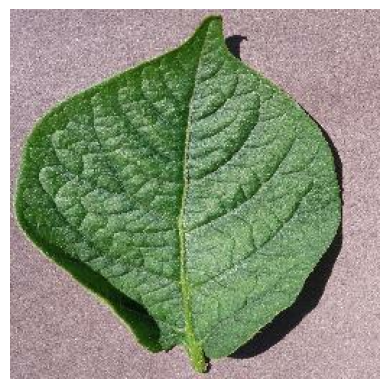

In [11]:
#visualization of data
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.imshow is used to visualize the image
    #convert the image_bacth from tensor to numpy for visualzation
    # and convert it into float to int
    #randomly selecting the images
    plt.axis("off") # hide x and y-axis

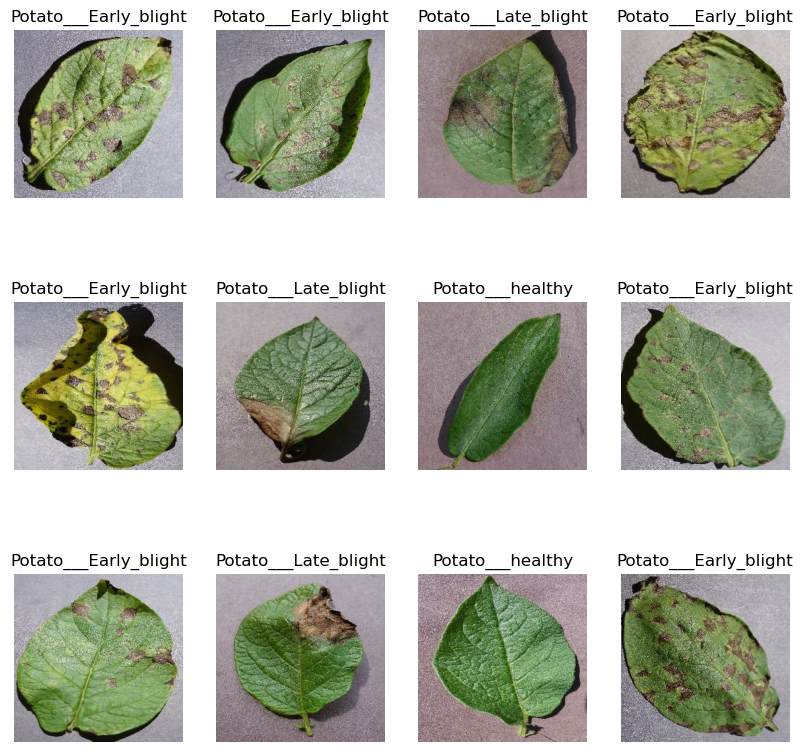

In [12]:
#visualization of data
 #increase the size of the images
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12): # displaying the 12 images
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])# assigning the title by using index no. of the dataset
        plt.axis("off") # hide x and y-axis
        



In [13]:
len(dataset)

68

In [14]:
68*32 # 32 because each data is of 32 batch

2176

In [15]:
# split the data into train and test
# 80% for training 
# 20 % for testing(in which 10 % for validation, 10% for test )
# validation is used during the training process when we run epochs

#lets try with 50 epochs
EPOCHS = 50

In [16]:
train_size = 0.8
len(dataset) * train_size


54.400000000000006

In [17]:
#dataset.take(54) takes the first 54 sample
train_ds = dataset.take(54)
len(train_ds)

54

In [18]:
test_ds = dataset.skip(54) # skipping the first 54 dataset and getting the next 54 dataset
len(test_ds)

14

In [19]:
#  10 % for validation
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [20]:
test_ds = test_ds.skip(6)
len(test_ds) #actual test dataset

8

In [21]:
# putting all the above code in a proper function
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        #randomly shuffling the datset 
        ds = ds.shuffle(shuffle_size, seed = 12) #seed is because we should not get same images, seed may be anynumber
        
        train_size = int(train_split * ds_size) #convert into integer
        val_size = int(val_split *  ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size) # first skip and then take the dataset
        test_ds = ds.skip(train_size).take(val_size)
        
        return train_ds, val_ds, test_ds
        

In [22]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)
len(train_ds)


54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

6

In [25]:
# train dataset = train_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
# prefetch will load next batch of the images, when current batch is bussy

#validation dataset = val_ds
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
#test dataset = test_ds
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory


In [26]:
#resizing and rescaling the images
resizing_and_rescaling = tf.keras.Sequential([
    #resizing and rescaling each image layer
    # .experimental is an API
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augumentation =  tf.keras.Sequential([
    # concert the image into horizontal and vertical (landsacpe and portrait )
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [29]:
#Model Building CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 # our no. of classes(folders) are three

model = models.Sequential([
    resizing_and_rescaling, # first resizing_and_rescaling
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
     # trial and error with neurons 32 and 64
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
     #after pooling we should do flatten the model
    layers.Flatten(),
    
      #adding dense layer of 64 neurons
    layers.Dense(64, activation='relu'),
    
    #     normalize the classes
    # softmax normalize the probability of the classes
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
from keras import utils as np_utils

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)
# here we get the validation accuracy and accuracy of the model at each train
# accuracy will be keep on increasing as we train

Epoch 1/50
54/54 [==============================] - 101s 2s/step - loss: 0.9027 - accuracy: 0.4769 - val_loss: 0.8206 - val_accuracy: 0.5781
Epoch 2/50
54/54 [==============================] - 88s 2s/step - loss: 0.7445 - accuracy: 0.6279 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 88s 2s/step - loss: 0.5653 - accuracy: 0.7263 - val_loss: 0.4262 - val_accuracy: 0.7708
Epoch 4/50
54/54 [==============================] - 87s 2s/step - loss: 0.4050 - accuracy: 0.8310 - val_loss: 0.4256 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 87s 2s/step - loss: 0.2756 - accuracy: 0.8883 - val_loss: 0.2525 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 87s 2s/step - loss: 0.1834 - accuracy: 0.9306 - val_loss: 0.1259 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 91s 2s/step - loss: 0.1471 - accuracy: 0.9468 - val_loss: 0.0949 - val_accuracy: 0.9740
Epoch 8/50
54/54 [=

In [34]:
#  model compling using optimizer, loss and metrics
# model.compile(
#     optimizer = 'adam',
#      loss = tf.keras.utils.np_utils.to_categorical(from_logits = False),
#     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )

In [35]:
# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [36]:
score = model.evaluate(test_ds)
score

6/6 [==============================] - 4s 300ms/step - loss: 0.0057 - accuracy: 0.9948


[0.0056770904920995235, 0.9947916865348816]

In [37]:
history

In [38]:
history.params # parameters

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
history.history['accuracy']

[0.47685185074806213,
 0.6278935074806213,
 0.7262731194496155,
 0.8310185074806213,
 0.8883101940155029,
 0.9305555820465088,
 0.9467592835426331,
 0.9276620149612427,
 0.9525462985038757,
 0.9577546119689941,
 0.9716435074806213,
 0.9629629850387573,
 0.9785879850387573,
 0.9814814925193787,
 0.9849537014961243,
 0.9780092835426331,
 0.9895833134651184,
 0.9930555820465088,
 0.9913194179534912,
 0.9947916865348816,
 0.9797453880310059,
 0.9849537014961243,
 0.9924768805503845,
 0.984375,
 0.9918981194496155,
 0.9988425970077515,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [41]:
len(history.history['accuracy'])

50

In [42]:
# visualize the train and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

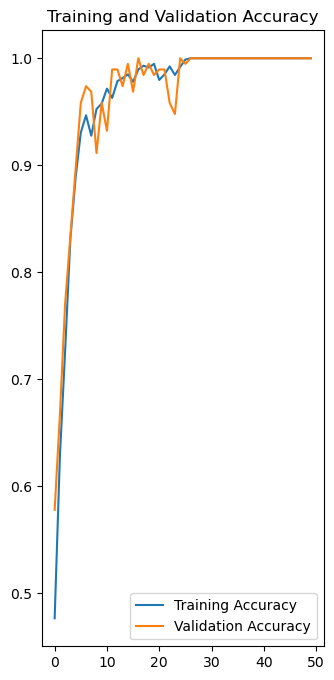

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#graphs shows the increase in accuracy

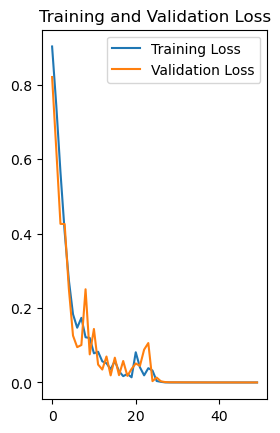

In [44]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# graphs shows the loss

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 519ms/step
predicted label: Potato___Early_blight


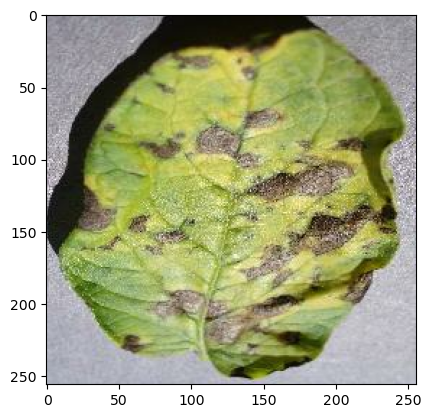

In [45]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
# function which takes model and image as input and tells predict class and confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


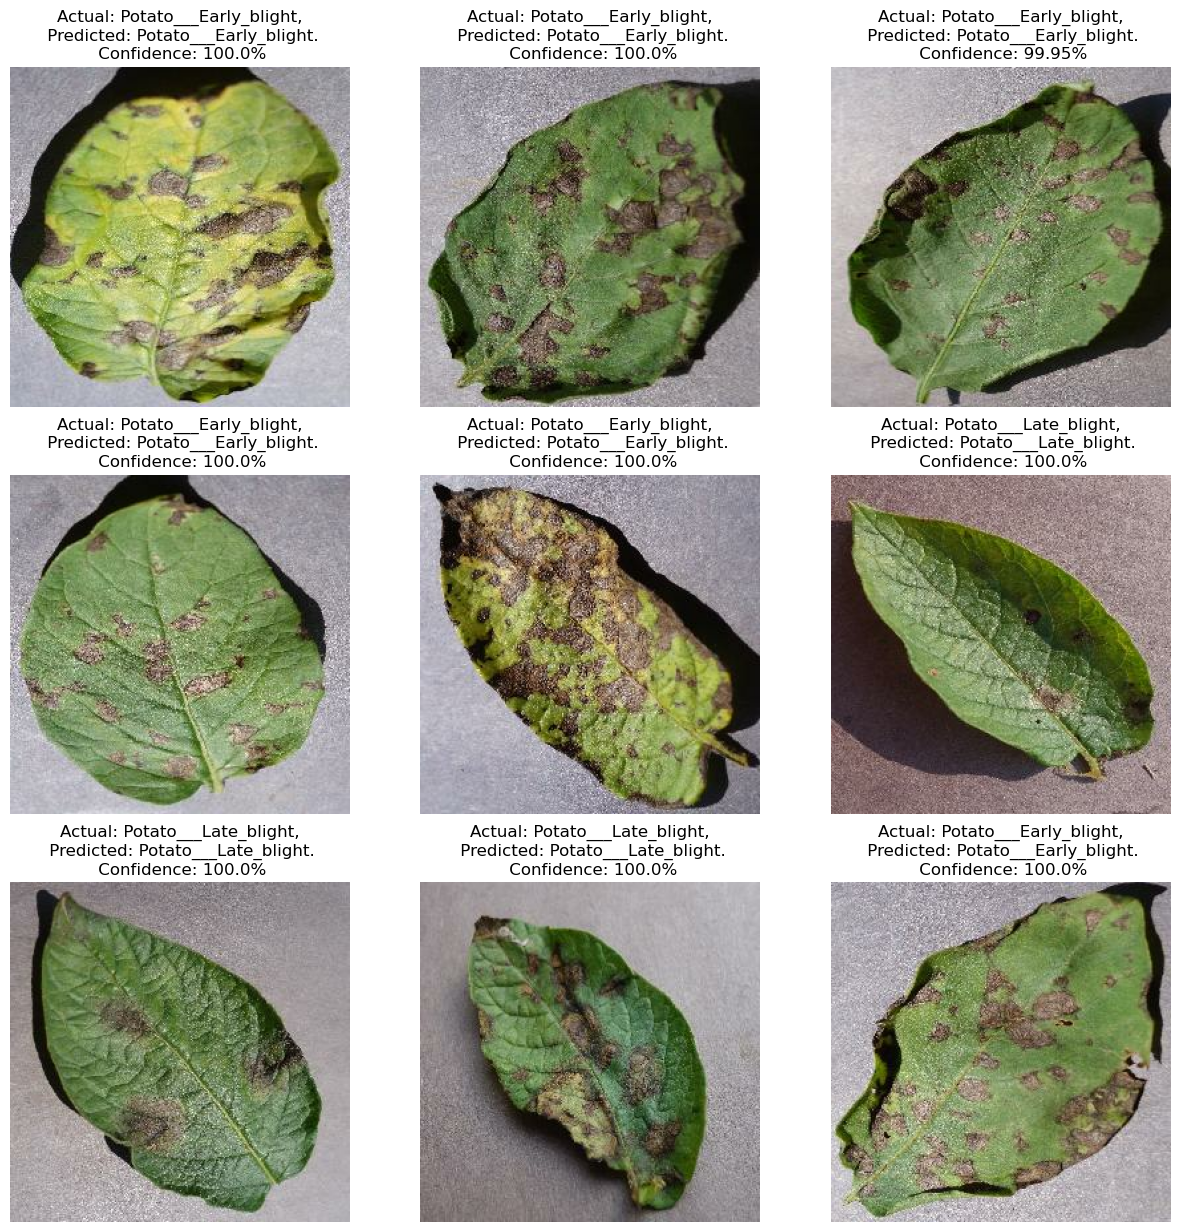

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [72]:
# save the model
import os
# automatically create the version of the model
model_version=max([int(i) for i in os.listdir(r"C:\Users\Admin\Desktop\ADS Project\training\models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [71]:
import os
os.chdir(r'C:\Users\Admin\Desktop\ADS Project\training\models')

In [69]:
model.save("../potatoes.h5")

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
